<a href="https://colab.research.google.com/github/KVKTRAN/CANDEV_4044/blob/main/CANDEV_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import folium
import matplotlib 
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

path = '/content/AIS_2020_01_clean.csv'
data = pd.read_csv(path)

data = data[['Lat', 'Lon', 'SOG']]
data = data[data['SOG'] > 20]
data.head()

,Lat,Lon,SOG
2595,41.49881,-70.23213,30.6
2597,41.35628,-70.12986,31.9
2598,41.60060,-70.28185,31.9
2617,41.40641,-70.17539,31.1
2619,41.30965,-70.10078,31.4


In [ ]:
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt


In [ ]:
test_data = data.to_numpy()

model = DBSCAN(min_samples=50).fit(test_data)
print(model)                                   

DBSCAN(min_samples=50)


In [ ]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.

data['Label'] = model.labels_
# data[data['Label'] != -1]
# data['Label'].unique
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

[ 0  0  0 ...  1 -1 -1]


3

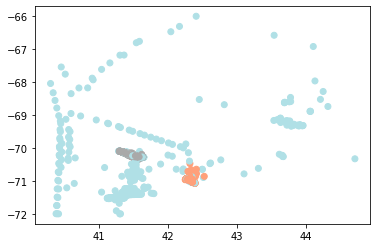

In [ ]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.scatter(x=data['Lat'], y=data['Lon'], c=color_theme[model.labels_])